    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0             6      148             72             35        0  33.60   
2             8      183             64             27        0  23.30   
4             0      137             40             35      168  43.10   
6             3       78             50             32       88  31.00   
8             2      197             70             45      543  30.50   
9             8      125             96             27        0  34.25   
11           10      168             74             27        0  38.00   
13            1      189             60             23      846  30.10   
14            5      166             72             19      175  25.80   
15            7      100             74             27        0  30.00   
16            0      118             84             47      230  45.80   
17            7      107             74             27        0  29.60   
19            1      115             7

 [  1993 / 10000 ]  20% - 0:00:01 left 

 [  3010 / 10000 ]  30% - 0:00:01 left 

 [  4015 / 10000 ]  40% - 0:00:01 left 

 [  5095 / 10000 ]  51% - 0:00:00 left 

 [  6203 / 10000 ]  62% - 0:00:00 left 

 [  7306 / 10000 ]  73% - 0:00:00 left 

 [  8370 / 10000 ]  84% - 0:00:00 left 

 [  9358 / 10000 ]  94% - 0:00:00 left 

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.06808839106080063
 topographic error: 0.6268656716417911


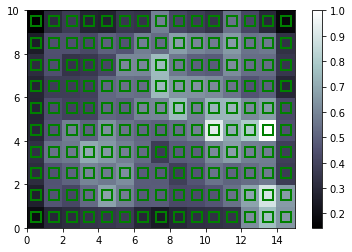

268
<class 'list'>
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
2            8      183             64             27        0  23.3   
4            0      137             40             35      168  43.1   
6            3       78             50             32       88  31.0   
8            2      197             70             45      543  30.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
2                     0.672   32        1  
4                     2.288   33        1  
6                     0.248   26        1  
8                     0.158   53        1  


C:\Users\Vibha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


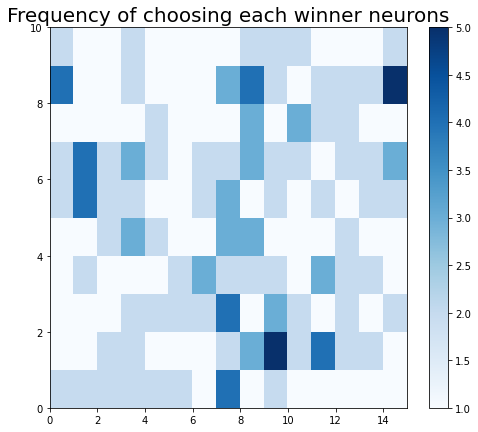

length of X: 268


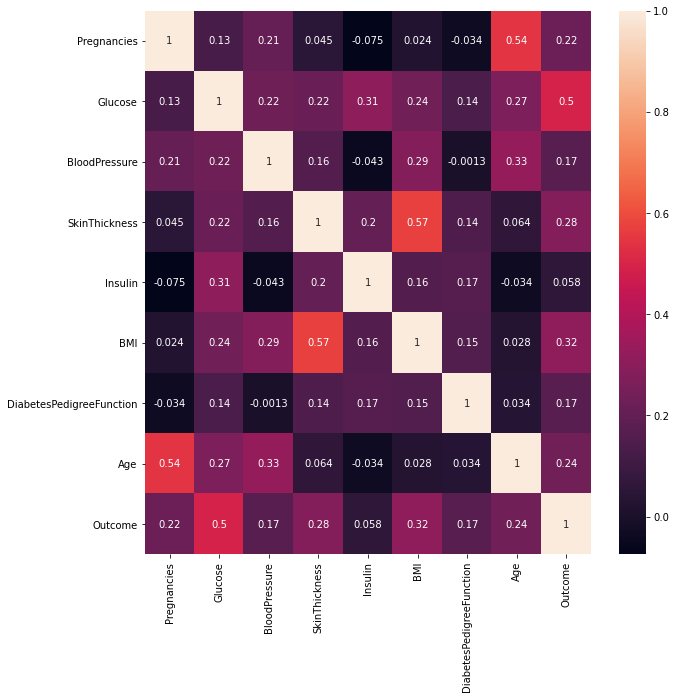

In [24]:
import numpy as np
import itertools
from matplotlib.gridspec import GridSpec
np.random.seed(1)
import matplotlib.pyplot as plt
import pandas as pd
import skimage.data
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
from skimage.transform import resize
import Final22
from neupy import algorithms
from pandas import read_csv
from collections import defaultdict
import os
import sklearn.metrics
from SimpSOM import somNet
%matplotlib inline
# Importing the dataset 
dataset=pd.read_csv('diabetes (1).csv')


df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'BloodPressure':0}, np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

#Replacing the zero-values for BMI
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'BMI':0}, np.median(df1['BMI']))
df2 = df2.replace({'BMI':0}, np.median(df2['BMI']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)


#Replacing the zero-values for Glucose
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'Glucose':0}, np.median(df1['Glucose']))
df2 = df2.replace({'Glucose':0}, np.median(df2['Glucose']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

#Replacing the zero-values for Insulin
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'Insulin':0}, np.median(df1['Insulin']))
df2 = df2.replace({'Insulin':0}, np.median(df2['Insulin']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

#Replacing the zero-values for Skin Thickness
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'SkinThickness':0}, np.median(df1['SkinThickness']))
df2 = df2.replace({'SkinThickness':0}, np.median(df2['SkinThickness']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

print(dataset.head(20))



X = dataset[dataset['Outcome']==1].iloc[:, :-1].values
y = dataset[dataset['Outcome']==1].iloc[:, -1].values

means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
X = (X - means)/stds
newdataset=dataset[dataset['Outcome']==1]
print(X)


# Training the SOM
from minisom import MiniSom

som = MiniSom(x=15, y=10, input_len=len(X.T),sigma=0.5,random_seed=10,learning_rate=1.8,
              neighborhood_function='gaussian')
som.random_weights_init(X)
som.train_batch(X, 10000, verbose=True)


som_shape=(15,10)
winner_coordinates = np.array([som.winner(x) for x in X]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)



# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
win=[]
for i, x in enumerate(X):
    w = som.winner(x)
    win.append(w)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()

mappings = som.win_map(X)

print(len(X))
print(type(win))

newdataset['winner']=win
print(dataset.head())

plt.figure(figsize=(8, 7))
frequencies = som.activation_response(X)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.title("Frequency of choosing each winner neurons",fontsize=20)
plt.show()

print("length of X:",len(X))



labels_map = som.labels_map(X, y)
label_names = np.unique(y)

plt.figure(figsize=(10, 10))

sns.heatmap(dataset.corr(),annot=True)




In [25]:
# Importing the libraries
import hebbian
import seaborn
import numpy as np
import itertools
from matplotlib.gridspec import GridSpec
np.random.seed(1)
import matplotlib.pyplot as plt
import pandas as pd
import skimage.data
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
from skimage.transform import resize
import Final2
from neupy import algorithms
from pandas import read_csv
from collections import defaultdict
import os
from SimpSOM import somNet

model1=hebbian.Hebbian(eta=0.0005,n_iter=1)



newdataset['winner']=win
pdf=pd.DataFrame(win,columns=['p1','p2'])


pdf1=pdf.iloc[:, :].values
print("this is pdf1", pdf1)
print("the weight assigned to each input feature of the winner neuron using hebbian rule :")
model1.fit((np.array(pdf1)),(np.array(newdataset['Outcome'])))

ac=list(model1.net_input(np.array(pdf1)))
print("Net activation of every winner neuron from the input layer :",list(model1.net_input(np.array(pdf1))))
print("UPDATED WEIGHTS OF THE NETWORK",model1.w_)


this is pdf1 [[ 2  5]
 [ 0  3]
 [12  0]
 [12  9]
 [14  4]
 [ 5  3]
 [ 4  5]
 [13  4]
 [ 0  2]
 [ 7  4]
 [11  3]
 [ 7  4]
 [10  7]
 [ 3  4]
 [ 9  8]
 [ 3  1]
 [ 3  6]
 [ 3  5]
 [12  1]
 [ 3  8]
 [ 7  8]
 [ 7  7]
 [ 3  3]
 [13  1]
 [ 4  6]
 [ 1  1]
 [13  3]
 [ 6  3]
 [ 6  3]
 [ 9  6]
 [13  8]
 [ 5  5]
 [ 9  1]
 [ 4  4]
 [ 4  9]
 [ 0  9]
 [11  3]
 [11  0]
 [ 7  2]
 [ 6  1]
 [ 0  0]
 [14  5]
 [ 0  8]
 [ 8  2]
 [10  5]
 [ 7  2]
 [ 7  9]
 [ 5  2]
 [ 1  9]
 [14  8]
 [ 9  9]
 [12  6]
 [ 6  3]
 [ 3  2]
 [ 2  4]
 [ 8  5]
 [ 5  7]
 [ 9  6]
 [10  9]
 [ 7  4]
 [ 8  1]
 [13  2]
 [10  4]
 [ 8  4]
 [ 1  4]
 [ 0  0]
 [ 8  6]
 [10  8]
 [ 6  0]
 [ 1  5]
 [ 5  6]
 [12  3]
 [14  9]
 [ 7  8]
 [13  6]
 [ 1  0]
 [ 5  3]
 [ 3  4]
 [ 9  1]
 [ 6  4]
 [ 6  7]
 [ 7  8]
 [ 7  6]
 [ 7  3]
 [13  5]
 [ 0  8]
 [12  7]
 [10  1]
 [11  4]
 [ 9  2]
 [ 1  2]
 [10  0]
 [ 1  3]
 [13  9]
 [ 9  9]
 [ 1  3]
 [11  9]
 [ 9  0]
 [ 3  2]
 [11  1]
 [ 8  8]
 [11  1]
 [ 7  0]
 [ 6  5]
 [ 8  8]
 [ 9  1]
 [ 1  6]
 [ 0  9]
 [10  6]
 [ 8  

C:\Users\Vibha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [26]:
print(dataset.columns)
df1=pd.DataFrame(X,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
print(df1.describe())

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  2.680000e+02  2.680000e+02   2.680000e+02   2.680000e+02  2.680000e+02   
mean  -9.610886e-17  1.325639e-17   1.590767e-16  -5.965377e-17  4.639738e-17   
std    1.001871e+00  1.001871e+00   1.001871e+00   1.001871e+00  1.001871e+00   
min   -1.302984e+00 -2.184644e+00  -3.799504e+00  -2.700525e+00 -7.248120e-01   
25%   -8.343495e-01 -7.916845e-01  -6.082340e-01  -4.528831e-01 -7.248120e-01   
50%   -2.318193e-01 -7.821767e-02  -1.043493e-01  -4.528831e-01 -7.248120e-01   
75%    8.393456e-01  8.390969e-01   5.674971e-01   5.585558e-01  4.833787e-01   
max    3.249466e+00  1.926284e+00   3.254882e+00   7.638628e+00  5.386574e+00   

                BMI  DiabetesPedigreeFunction           Age  
count  2.680000e+02              2.680000e+02  

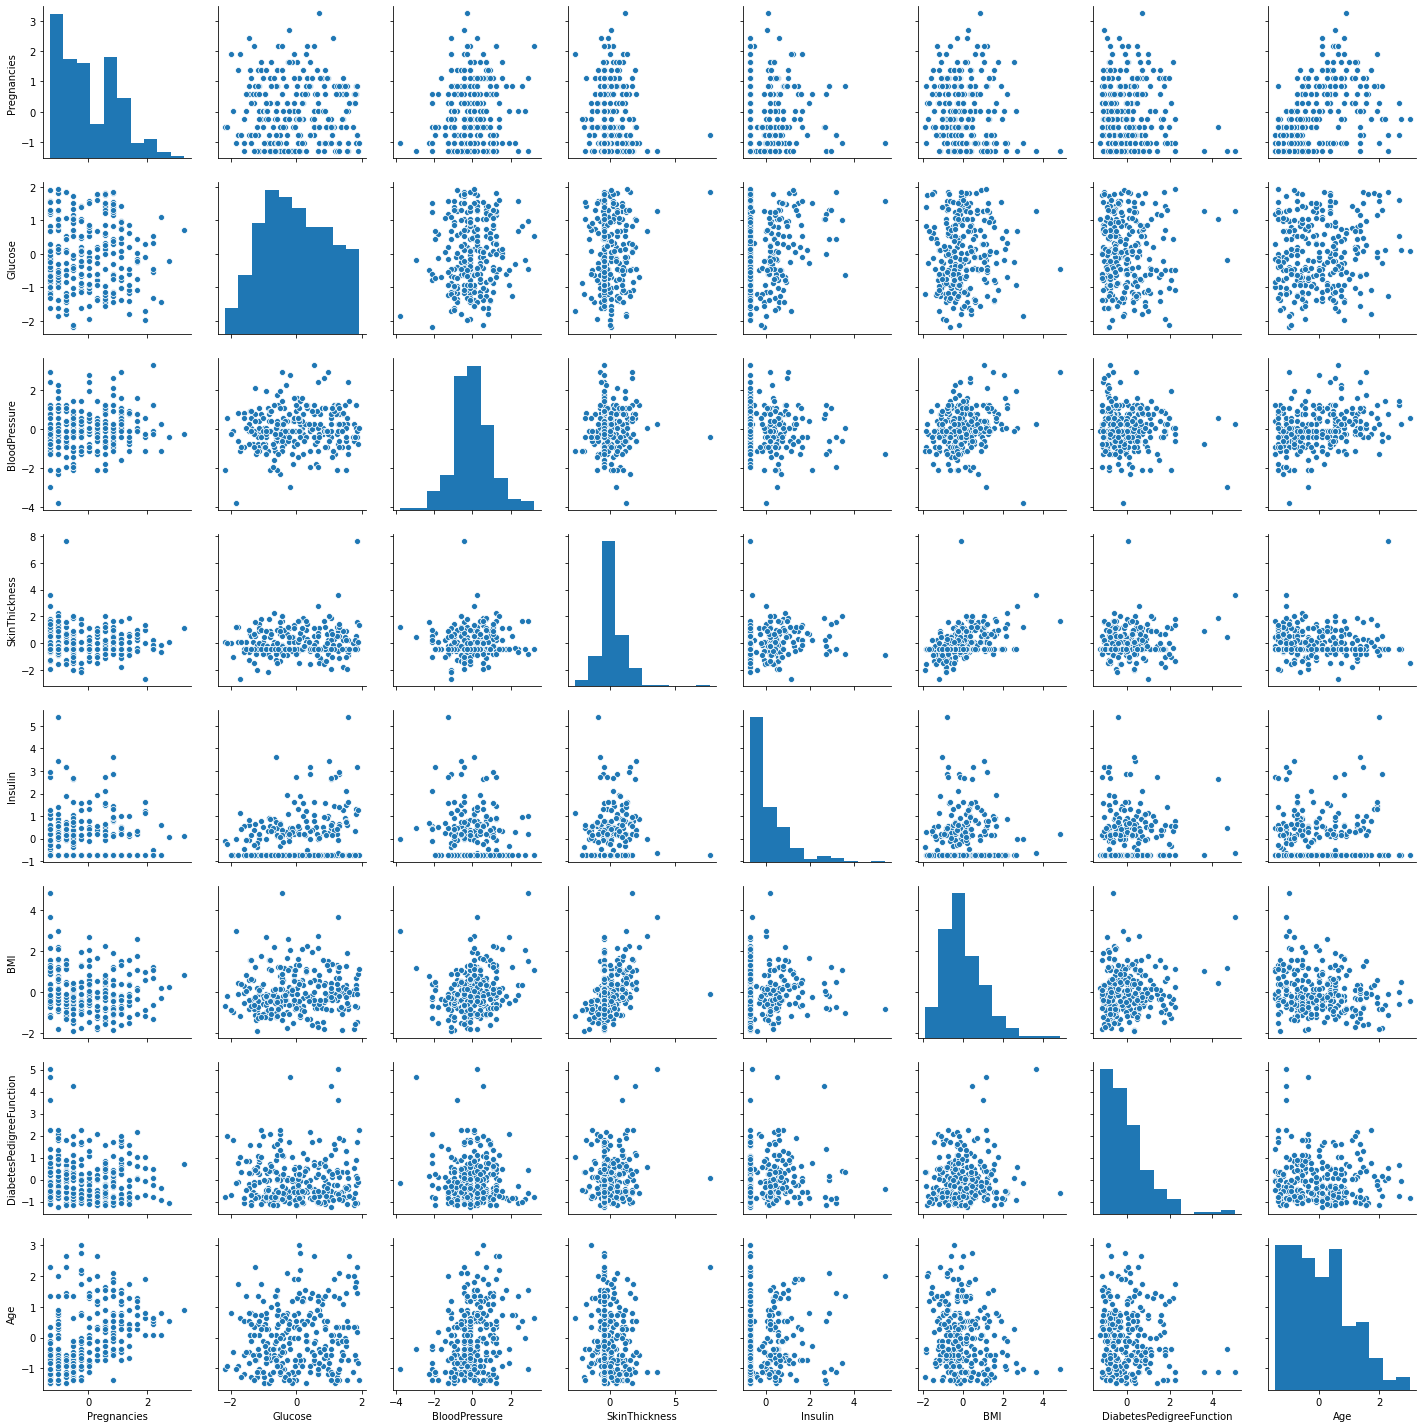

In [27]:
import seaborn as sns
sns.pairplot(df1,palette='coolwarm')

In [29]:
from sklearn.cluster import KMeans
df=pd.DataFrame(ac)
df.dropna(axis=0,inplace=True)
print(df)
df.info()
newdataset['weights']=ac
print(newdataset)

           0
0    -5.0245
1    -1.9265
2   -11.5520
3   -16.9295
4   -15.8450
..       ...
263 -11.3310
264  -9.5385
265  -4.3165
266  -4.4270
267 -14.7830

[268 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 267
Data columns (total 1 columns):
0    268 non-null float64
dtypes: float64(1)
memory usage: 4.2 KB
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
2              8      183             64             27        0  23.3   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
..           ...      ...            ...            ...      ...   ...   
755            1      128             88             39      110  36.5   
757            0      123             72             27   

C:\Users\Vibha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


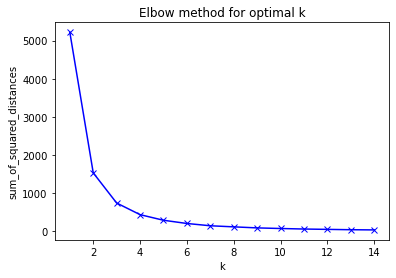

In [30]:
l=np.array(ac).reshape(-1,1)
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(np.array(ac).reshape(-1,1)) 
    sum_of_squared_distances.append(k_means.inertia_)
          
            
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

In [31]:
kmeans=KMeans(n_clusters=4)

In [32]:
kmeans.fit_predict(l)
centroids=kmeans.cluster_centers_
ok=kmeans.labels_

0      -5.0245
2      -1.9265
4     -11.5520
6     -16.9295
8     -15.8450
        ...   
755   -11.3310
757    -9.5385
759    -4.3165
761    -4.4270
766   -14.7830
Name: weights, Length: 268, dtype: float64
     Severity of diabetes  weights
0                       0  -5.0245
2                       0  -1.9265
4                       1 -11.5520
6                       2 -16.9295
8                       2 -15.8450
..                    ...      ...
755                     1 -11.3310
757                     3  -9.5385
759                     0  -4.3165
761                     0  -4.4270
766                     2 -14.7830

[268 rows x 2 columns]
[[ -3.9939    ]
 [-12.30057639]
 [-16.21173864]
 [ -8.31826829]]


C:\Users\Vibha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


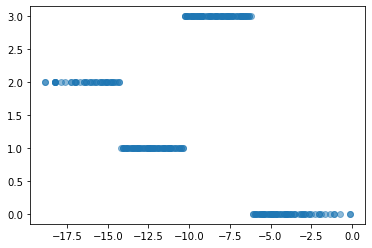

In [33]:
print(newdataset['weights'])
newdataset['Severity of diabetes']=ok
print(newdataset[['Severity of diabetes','weights']])
plt.scatter(newdataset['weights'],ok,alpha=0.5)
print(centroids)


In [34]:

newdataset['Severity of diabetes'].replace(to_replace =2, 
                 value ="LOW",inplace=True)
newdataset['Severity of diabetes'].replace(to_replace =1, 
                 value ="MODERATE",inplace=True)
newdataset['Severity of diabetes'].replace(to_replace =3, 
                 value ="HIGH",inplace=True)
newdataset['Severity of diabetes'].replace(to_replace =0, 
                 value ="ALARMING",inplace=True)

newdataset.dropna(axis=0,inplace=True)
newdataset.reset_index(drop=True,inplace=True)
    
print(newdataset.head(10))
print(newdataset['Outcome'].value_counts())
print(newdataset["Severity of diabetes"].value_counts())

    
    

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            6      148             72             35        0  33.60   
1            8      183             64             27        0  23.30   
2            0      137             40             35      168  43.10   
3            3       78             50             32       88  31.00   
4            2      197             70             45      543  30.50   
5            8      125             96             27        0  34.25   
6           10      168             74             27        0  38.00   
7            1      189             60             23      846  30.10   
8            5      166             72             19      175  25.80   
9            7      100             74             27        0  30.00   

   DiabetesPedigreeFunction  Age  Outcome   winner  weights  \
0                     0.627   50        1   (2, 5)  -5.0245   
1                     0.672   32        1   (0, 3)  -1.9265   
2      

C:\Users\Vibha\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Vibha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [36]:
newdataset.loc[:,'error']=0
    
C=newdataset[newdataset['Severity of diabetes']=="LOW"][dataset['Outcome']==1]['error'].count()
c=newdataset[newdataset['Outcome']==0]['error'].count()
d=newdataset[newdataset['Outcome']==1]['error'].count()

print("HIGH",newdataset[newdataset['Severity of diabetes']=='HIGH']['weights'])




  
    
print("Percentage of diabetic patients in the low category =",(C)/(c+d) * 100)

HIGH 5     -6.6840
6     -6.9275
9     -9.1845
11    -9.1845
16    -6.5735
        ...  
249   -6.8170
251   -7.0380
254   -8.5870
255   -9.4280
264   -9.5385
Name: weights, Length: 82, dtype: float64
Percentage of diabetic patients in the low category = 5.223880597014925


C:\Users\Vibha\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Vibha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


[[-0.76239998 -1.03820204 -0.40648848 ... -0.65352563 -0.26351295
  -0.01630064]
 [-0.76239998 -0.87612226 -0.40648848 ... -0.42260328 -0.87933819
  -0.87422927]
 [ 0.564667    0.21791627  0.26483849 ... -0.80747386 -0.76554439
  -0.10209351]
 ...
 [-0.43063323  0.46103594 -0.070825   ...  0.91674631 -0.30032859
  -0.35947209]
 [ 0.564667    0.42051599  0.09700675 ... -0.71510492 -0.61828184
  -0.10209351]
 [-0.76239998 -0.71404248 -0.070825   ... -0.06852236 -0.3840005
  -0.70264354]]


 [  1669 / 10000 ]  17% - 0:00:01 left 

 [  2520 / 10000 ]  25% - 0:00:01 left 

 [  3389 / 10000 ]  34% - 0:00:01 left 

 [  4214 / 10000 ]  42% - 0:00:01 left 

 [  5009 / 10000 ]  50% - 0:00:01 left 

 [  5819 / 10000 ]  58% - 0:00:00 left 

 [  6514 / 10000 ]  65% - 0:00:00 left 

 [  7385 / 10000 ]  74% - 0:00:00 left 

 [  8281 / 10000 ]  83% - 0:00:00 left 

 [  9167 / 10000 ]  92% - 0:00:00 left 

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.07531519182319986
 topographic error: 0.708


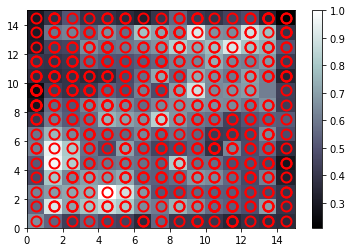

500
<class 'list'>


C:\Users\Vibha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


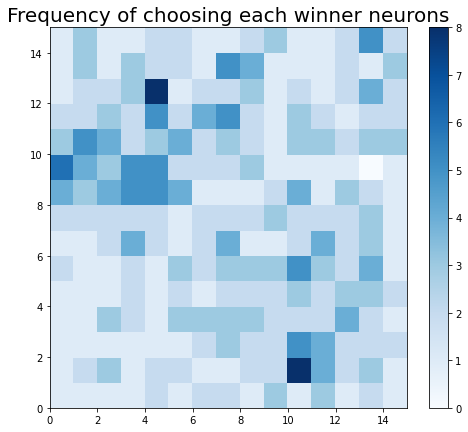

length of X: 500


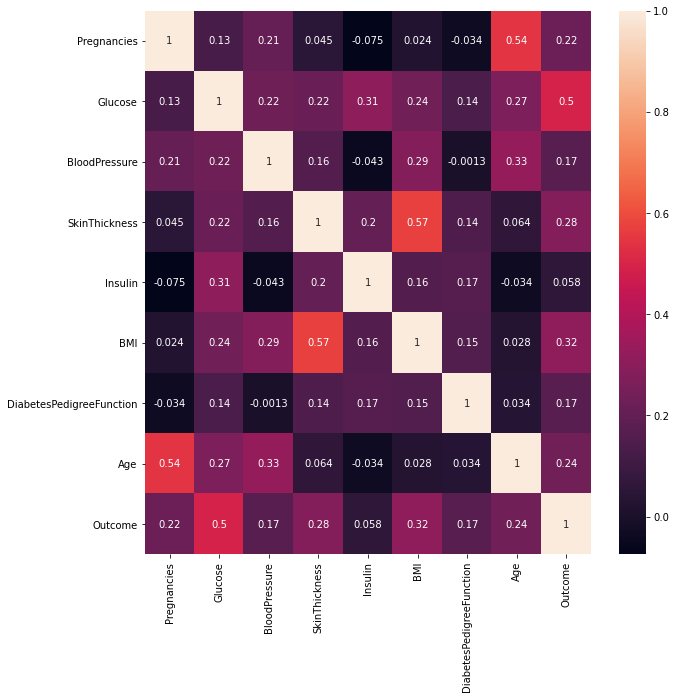

In [42]:
X1 = dataset[dataset['Outcome']==0].iloc[:, :-1].values
y1 = dataset[dataset['Outcome']==0].iloc[:, -1].values

means = np.mean(X1, axis=0)
stds = np.std(X1, axis=0)
X1 = (X1 - means)/stds
newdataset=dataset[dataset['Outcome']==0]
print(X1)


# Training the SOM
from minisom import MiniSom

som = MiniSom(x=15, y=15, input_len=len(X.T),sigma=0.5,random_seed=10,learning_rate=1.8,
              neighborhood_function='gaussian')
som.random_weights_init(X1)
som.train_batch(X1, 10000, verbose=True)


som_shape=(15,15)
winner_coordinates = np.array([som.winner(x) for x in X1]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)



# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
win=[]
for i, x in enumerate(X1):
    w = som.winner(x)
    win.append(w)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y1[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()

mappings = som.win_map(X1)

print(len(X1))
print(type(win))

newdataset['winner']=win

plt.figure(figsize=(8, 7))
frequencies = som.activation_response(X1)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.title("Frequency of choosing each winner neurons",fontsize=20)
plt.show()

print("length of X:",len(X1))



labels_map = som.labels_map(X1, y1)
label_names = np.unique(y1)

plt.figure(figsize=(10, 10))

sns.heatmap(dataset.corr(),annot=True)




In [43]:
import hebbian
import seaborn
import numpy as np
import itertools
from matplotlib.gridspec import GridSpec
np.random.seed(1)
import matplotlib.pyplot as plt
import pandas as pd
import skimage.data
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
from skimage.transform import resize
import Final2
from neupy import algorithms
from pandas import read_csv
from collections import defaultdict
import os

model1=hebbian.Hebbian(eta=0.0005,n_iter=1)



newdataset['winner']=win
pdf=pd.DataFrame(win,columns=['p1','p2'])


pdf1=pdf.iloc[:, :].values
print("this is pdf1", pdf1)
print("the weight assigned to each input feature of the winner neuron using hebbian rule :")
model1.fit((np.array(pdf1)),(np.array(newdataset['Outcome'])))

ac=list(model1.net_input(np.array(pdf1)))
print("Net activation of every winner neuron from the input layer :",list(model1.net_input(np.array(pdf1))))
print("UPDATED WEIGHTS OF THE NETWORK",model1.w_)


this is pdf1 [[ 4  9]
 [ 1 10]
 [ 7 13]
 [11 11]
 [ 5  5]
 [ 8 14]
 [ 4  7]
 [ 3  4]
 [13 12]
 [ 4 10]
 [12 10]
 [ 5  5]
 [13 12]
 [ 3  8]
 [13  1]
 [ 5  1]
 [ 6  9]
 [14 10]
 [ 8  1]
 [14  2]
 [14 14]
 [ 9  1]
 [ 5 14]
 [10  8]
 [ 4 12]
 [ 1  9]
 [ 4 11]
 [ 4 12]
 [ 1  0]
 [ 0 11]
 [ 7  7]
 [ 0  5]
 [ 6  6]
 [ 0  9]
 [10 10]
 [ 5  8]
 [11  2]
 [11 12]
 [ 2 10]
 [ 1 13]
 [ 9  2]
 [14  6]
 [ 4  9]
 [13  5]
 [10 10]
 [11  5]
 [10  1]
 [ 5 13]
 [ 0  9]
 [ 1  7]
 [ 7 10]
 [ 2  7]
 [ 8  4]
 [10  5]
 [ 1 10]
 [ 5 11]
 [13  0]
 [ 7  0]
 [12  0]
 [ 2  1]
 [ 0 10]
 [ 5 11]
 [11  4]
 [ 2 12]
 [ 1 14]
 [ 0  9]
 [ 7  8]
 [ 5  8]
 [ 2 14]
 [ 8  2]
 [ 0 10]
 [ 4  9]
 [11  3]
 [11  3]
 [11  1]
 [ 4 12]
 [ 7  2]
 [13  4]
 [13 14]
 [ 4  5]
 [10  7]
 [ 6  0]
 [ 2  9]
 [ 4 14]
 [ 2  8]
 [ 4 10]
 [13  3]
 [ 1  1]
 [ 8 13]
 [ 7  3]
 [12  5]
 [ 2  1]
 [ 2  8]
 [ 5  0]
 [ 8  8]
 [13 14]
 [ 0  9]
 [ 7  6]
 [ 1  8]
 [ 0  3]
 [ 4 11]
 [ 5  9]
 [ 0  9]
 [ 4  1]
 [ 6  3]
 [ 1  3]
 [13  2]
 [14  3]
 [ 7 14]
 [12  

C:\Users\Vibha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [44]:
print(dataset.columns)
df1=pd.DataFrame(X,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
print(df1.describe())

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  5.000000e+02  5.000000e+02   5.000000e+02   5.000000e+02  5.000000e+02   
mean   3.552714e-18  8.881784e-18   5.009326e-16   1.119105e-16 -1.776357e-17   
std    1.001002e+00  1.001002e+00   1.001002e+00   1.001002e+00  1.001002e+00   
min   -1.094167e+00 -2.699520e+00  -3.930955e+00  -2.066186e+00 -8.281250e-01   
25%   -7.624000e-01 -7.140425e-01  -6.162782e-01  -5.027548e-01 -5.528480e-01   
50%   -4.306332e-01 -1.467632e-01  -7.082500e-02  -5.027548e-01 -5.471130e-01   
75%    5.646670e-01  5.825958e-01   6.005020e-01   6.139818e-01  2.041638e-01   
max    3.218801e+00  3.500032e+00   4.292800e+00   3.852518e+00  7.533414e+00   

                BMI  DiabetesPedigreeFunction           Age  
count  5.000000e+02              5.000000e+02  

In [45]:
from sklearn.cluster import KMeans
df=pd.DataFrame(ac)
df.dropna(axis=0,inplace=True)
print(df)
df.info()
newdataset['weights']=ac
print(newdataset)



           0
0   -23.5370
1   -20.0915
2   -36.0275
3   -39.4155
4   -18.0525
..       ...
495 -37.6065
496  -5.5045
497 -26.8100
498 -36.0275
499 -23.5370

[500 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 1 columns):
0    500 non-null float64
dtypes: float64(1)
memory usage: 7.8 KB
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1              1       85             66             29       39  26.6   
3              1       89             66             23       94  28.1   
5              5      116             74             21       39  25.6   
7             10      115             70             21       39  35.3   
10             4      110             92             21       39  37.6   
..           ...      ...            ...            ...      ...   ...   
762            9       89             62             21       39  22.5   
763           10      101             76             48   

C:\Users\Vibha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
kmeans=KMeans(n_clusters=4)

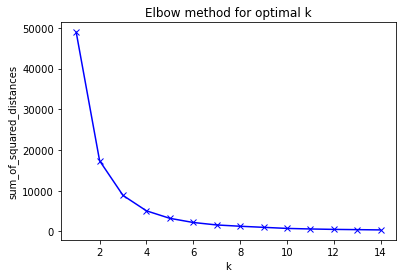

In [50]:
l=np.array(ac).reshape(-1,1)
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(np.array(ac).reshape(-1,1)) 
    sum_of_squared_distances.append(k_means.inertia_)
          
            
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

In [51]:
kmeans.fit_predict(l)
centroids=kmeans.cluster_centers_
ok=kmeans.labels_

1     -23.5370
3     -20.0915
5     -36.0275
7     -39.4155
10    -18.0525
        ...   
762   -37.6065
763    -5.5045
764   -26.8100
765   -36.0275
767   -23.5370
Name: weights, Length: 500, dtype: float64
     Severity of diabetes  weights
1                       3 -23.5370
3                       3 -20.0915
5                       0 -36.0275
7                       0 -39.4155
10                      3 -18.0525
..                    ...      ...
762                     0 -37.6065
763                     1  -5.5045
764                     2 -26.8100
765                     0 -36.0275
767                     3 -23.5370

[500 rows x 2 columns]
[[-40.78770556]
 [-10.28418382]
 [-29.0885289 ]
 [-20.13569822]]


C:\Users\Vibha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


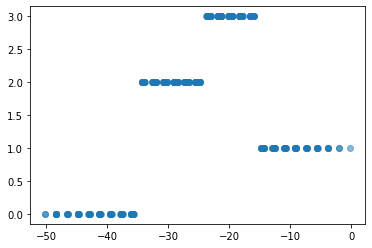

In [52]:
print(newdataset['weights'])
newdataset['Severity of diabetes']=ok
print(newdataset[['Severity of diabetes','weights']])
plt.scatter(newdataset['weights'],ok,alpha=0.5)
print(centroids)


In [53]:
newdataset['Severity of diabetes'].replace(to_replace =0, 
                 value ="VERY LESS RISK",inplace=True)
newdataset['Severity of diabetes'].replace(to_replace =2, 
                 value ="MODERATE RISK",inplace=True)
newdataset['Severity of diabetes'].replace(to_replace =3, 
                 value ="HIGH RISK",inplace=True)
newdataset['Severity of diabetes'].replace(to_replace =1, 
                 value ="CAN BE DIABETIC",inplace=True)

newdataset.dropna(axis=0,inplace=True)
newdataset.reset_index(drop=True,inplace=True)
    
print(newdataset.head(10))
print(newdataset['Outcome'].value_counts())
print(newdataset["Severity of diabetes"].value_counts())

    

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       85             66             29       39  26.6   
1            1       89             66             23       94  28.1   
2            5      116             74             21       39  25.6   
3           10      115             70             21       39  35.3   
4            4      110             92             21       39  37.6   
5           10      139             80             21       39  27.1   
6            1      103             30             38       83  43.3   
7            3      126             88             41      235  39.3   
8            8       99             84             21       39  35.4   
9            1       97             66             15      140  23.2   

   DiabetesPedigreeFunction  Age  Outcome    winner  weights  \
0                     0.351   31        0    (4, 9) -23.5370   
1                     0.167   21        0   (1, 10) -20.0915   
2              

C:\Users\Vibha\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Vibha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
